In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np

import seaborn as sns

import datetime
import random
random.seed(30)
%matplotlib inline

In [2]:
#load the data
df = pd.read_csv("yellow_tripdata_2017-06.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14
2,2,2017-06-08 08:16:49,2017-06-08 15:43:22,6,5.63,1,N,137,41,2,21.5,1.0,0.5,0.00,0.0,0.3,23.30
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80


In [4]:
print ("total number of records: ",len(df))

total number of records:  9656993


In [5]:
#exploring datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656993 entries, 0 to 9656992
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [6]:
#number of passengers
df['passenger_count'].value_counts()

1    6933189
2    1385066
5     455753
3     406162
6     288220
4     187979
0        548
8         30
7         26
9         20
Name: passenger_count, dtype: int64

In [7]:
#different payment types
df['payment_type'].value_counts()

1    6514906
2    3073865
3      52711
4      15510
5          1
Name: payment_type, dtype: int64

In [8]:
#total amount paid by the customer by the lowest
#I'm assuming the negative values are returns
df['total_amount'].sort_values()[:10]

6294991   -550.30
4748715   -400.80
7430405   -360.96
7881612   -259.30
2970259   -223.56
9123663   -223.46
5527567   -216.30
6576944   -200.80
1624722   -200.35
2872716   -198.30
Name: total_amount, dtype: float64

In [9]:
#total amount paid by the customer sorted by the highest
#I know NYC can be expensive, but I doubt people will pay 630463.12 for a cab ride
df['total_amount'].sort_values(ascending=False)[:10]

5773420    630463.12
6007639    218317.09
3527931     12891.25
4201741      9999.99
9218988      9999.99
5640037      9999.99
5203847      9999.99
473417       8018.80
2427507      3011.60
2767752      1266.80
Name: total_amount, dtype: float64

In [10]:
#Top 10 total amount that's been paid by credit card or cash
#Even 1004 dollars seem a bit high for a taxi ride
df[(df['payment_type'] == 1) | (df['payment_type'] == 2)]['total_amount'].sort_values(ascending=False)[:10]

5773420    630463.12
6007639    218317.09
5640037      9999.99
4201741      9999.99
9218988      9999.99
5203847      9999.99
473417       8018.80
2427507      3011.60
2767752      1266.80
6326359      1004.80
Name: total_amount, dtype: float64

In [11]:
print (df['store_and_fwd_flag'].value_counts())
print (32087/len(df))

N    9624906
Y      32087
Name: store_and_fwd_flag, dtype: int64
0.0033226699035610774


In [12]:
df[((df['payment_type'] == 1) | (df['payment_type'] == 2)) & (df['store_and_fwd_flag']=='Y')]['total_amount'].sort_values(ascending=False)[:10]

7495734    331.80
2134702    307.55
6055049    297.80
2852074    264.30
2210241    250.30
2926979    227.30
1073882    216.80
7458903    212.80
6907588    200.30
2339783    196.30
Name: total_amount, dtype: float64

In [13]:
#top 10 total amount that was not charged, disputed, unknown, or voided
df[(df['payment_type'] != 1) & (df['payment_type'] != 2)]['total_amount'].sort_values(ascending=False)[:10]

3527931    12891.25
5326944      939.56
1913858      937.88
211565       900.31
2138576      893.84
2285854      859.52
1543609      858.65
4590126      858.65
6448401      840.30
6447609      840.30
Name: total_amount, dtype: float64

In [14]:
print ("total records of non-valid payments:",len(df[(df['payment_type'] != 1) & (df['payment_type'] != 2)]))

total records of non-valid payments: 68222


In [15]:
print ("total records of valid payments:", len(df[(df['payment_type'] == 1) | (df['payment_type'] == 2)]))

total records of valid payments: 9588771


[-50.56, -31.61, -4.5, -1.0, -0.5, -0.49, -0.45, -0.35, -0.2, 0.0, 0.01, 0.02, 0.1, 0.2, 0.21, 0.3, 0.4, 0.49, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.01, 1.3, 1.5, 2.0, 2.5, 4.5, 4.54, 4.8, 7.06, 7.4, 22.5]


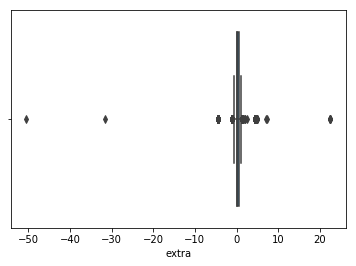

In [16]:
#looking at miscellaneous extras and surcharges
unique_extra = [round(i, 2) for i in df['extra'].unique()]
unique_extra.sort()
print (unique_extra)
sns.boxplot(x=df['extra'])

[-0.5, 0.0, 0.25, 0.32, 0.5, 0.85, 0.9, 1.3, 3.0, 10.3, 11.3, 14.65, 24.0, 31.0, 31.55, 32.41, 43.0, 51.36, 53.8, 97.75, 140.0]


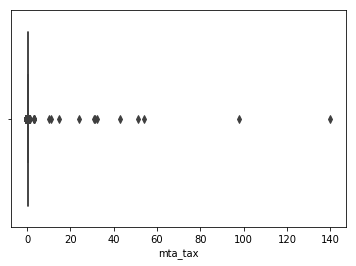

In [17]:
#unique mta tax values
unique_mta_tax = [round(i, 2) for i in df['mta_tax'].unique()]
unique_mta_tax.sort()
print (unique_mta_tax)
sns.boxplot(x=df['mta_tax'])

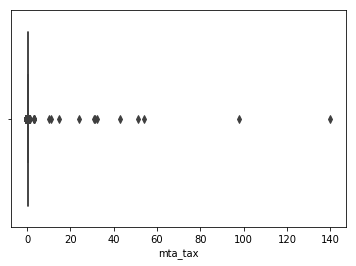

In [18]:
unique_tip_amount = [round(i, 2) for i in df['tip_amount'].unique()]
unique_tip_amount.sort()
# print (unique_tip_amount)
sns.boxplot(x=df['mta_tax'])

In [19]:
# unique_tolls_amount = [round(i, 2) for i in df['tolls_amount'].unique()]
# unique_tolls_amount.sort()
# print (unique_tolls_amount)

In [20]:
#unique improvement surcharges
unique_improvement_surcharge = [round(i, 2) for i in df['improvement_surcharge'].unique()]
unique_improvement_surcharge.sort()
print (unique_improvement_surcharge)
#sns.boxplot(x=df['improvement_surcharge'])

[-0.3, 0.0, 0.3, 1.0]


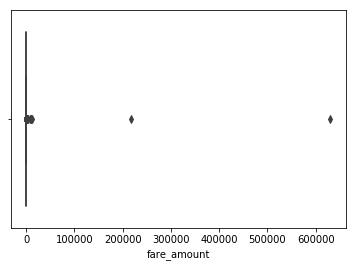

In [21]:
#box plot of unique fare amount
unique_fare_amount = [round(i, 2) for i in df['fare_amount'].unique()]
unique_fare_amount.sort()
# print (unique_fare_amount)
sns.boxplot(x=df['fare_amount'])

In [22]:
#filter out by valid payments that was either paid by credit card or cash and the total amount is positive
#ignoring the negative payments for now
valid_df = df[((df['payment_type'] == 1) | (df['payment_type'] == 2)) & (df['total_amount'] > 0)]
#calculate the z score of the total amount
z = np.abs(stats.zscore(valid_df['total_amount']))
print (len(z))

9587515


In [23]:
valid_df['total_amount'].sort_values(ascending=False)[:10]

5773420    630463.12
6007639    218317.09
9218988      9999.99
5640037      9999.99
4201741      9999.99
5203847      9999.99
473417       8018.80
2427507      3011.60
2767752      1266.80
6326359      1004.80
Name: total_amount, dtype: float64

In [24]:
# 95% of the data which excludes outliers from both ends
# filter out everything that has a z score higher than 2 or less than -2
df_filtered = valid_df[(z < 2) & (z > -2)]
print (len(df_filtered))

9587428


In [25]:
#top total payment after being filtered
df_filtered['total_amount'].sort_values(ascending=False)[:10]

367416     448.80
5919443    447.80
6363094    446.75
6099961    445.30
5115785    442.55
5739363    440.72
2166314    440.30
7083935    437.80
9219544    436.80
9165790    435.00
Name: total_amount, dtype: float64

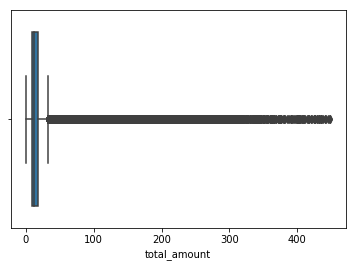

In [26]:
#box plot of new dataframe
# better looking boxplot, but still pretty skewed
sns.boxplot(x=df_filtered['total_amount'])

In [27]:
#quick description of the enw data
df_filtered['total_amount'].describe()

count    9.587428e+06
mean     1.656888e+01
std      1.436197e+01
min      5.000000e-02
25%      8.760000e+00
50%      1.200000e+01
75%      1.830000e+01
max      4.488000e+02
Name: total_amount, dtype: float64

In [28]:
print ("median of total amount: ",df_filtered['total_amount'].median())
print ("mean of total amount: ",df_filtered['total_amount'].mean())

median of total amount:  12.0
mean of total amount:  16.56887963591485


In [29]:
#convert datatype from string to datetime
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

/Users/SangYeob/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
#convert datatype from string to datetime
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])

/Users/SangYeob/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
#calculate how much time it took from one location to another
df_filtered['time_diff'] = df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']

/Users/SangYeob/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
#convert the time difference to seconds
df_filtered['time_diff'] = df_filtered['time_diff'].dt.total_seconds()

/Users/SangYeob/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
df_filtered['time_diff'].describe()

count    9.587428e+06
mean     1.013815e+03
std      3.328387e+03
min      0.000000e+00
25%      4.030000e+02
50%      6.780000e+02
75%      1.120000e+03
max      8.644590e+05
Name: time_diff, dtype: float64

In [34]:
#filter all the time that was 0. The meter was probably not triggered.
df_filtered = df_filtered[df_filtered['time_diff'] > 0]
print (len(df_filtered))

9578693


In [35]:
#calculate the z score for the time_diff
z = np.abs(stats.zscore(df_filtered['time_diff']))

In [36]:
#filter out the records with bad times. If it takes more than 24 hours to go anywhere around NY,NJ area,
# there is something wrong.
df_filtered = df_filtered[(z < 2) & (z > -2)]

In [37]:
df_filtered.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,time_diff
0,2,2017-06-08 07:52:31,2017-06-08 08:01:32,6,1.03,1,N,161,140,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16,541.0
1,2,2017-06-08 08:08:18,2017-06-08 08:14:00,6,1.03,1,N,162,233,1,6.0,1.0,0.5,2.34,0.0,0.3,10.14,342.0
3,2,2017-06-29 15:52:35,2017-06-29 16:03:27,6,1.43,1,N,142,48,1,8.5,1.0,0.5,0.88,0.0,0.3,11.18,652.0
4,1,2017-06-01 00:00:00,2017-06-01 00:03:43,1,0.60,1,N,140,141,1,4.5,0.5,0.5,2.00,0.0,0.3,7.80,223.0
8,1,2017-06-01 00:00:01,2017-06-01 00:01:43,1,0.20,1,N,148,148,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,102.0


In [38]:
#just checking the number of records
print (len(df_filtered))

9562778


In [39]:
#Top hours is about 2 hours and 8 minutes, which seems more reasonable with traffic
df_filtered['time_diff'].sort_values(ascending=False)[:10]

6545060    7673.0
6774123    7672.0
6406184    7672.0
6785604    7671.0
6710549    7670.0
9005413    7665.0
6775177    7664.0
8428539    7664.0
153816     7664.0
1479216    7664.0
Name: time_diff, dtype: float64

In [40]:
print ("Top 10 most popular pick up location")
print (df_filtered['PULocationID'].value_counts()[:10])

Top 10 most popular pick up location
237    376917
161    356052
236    340920
162    329168
186    325340
170    312850
230    306733
234    305820
48     299049
142    273872
Name: PULocationID, dtype: int64


In [41]:
print ("Top 10 most popular drop off location")
print (df_filtered['DOLocationID'].value_counts()[:10])

Top 10 most popular drop off location
161    361452
236    348681
237    330420
170    308691
230    295746
162    294870
234    264300
186    259783
48     253196
142    244460
Name: DOLocationID, dtype: int64


In [42]:
#group by pick up zoneo and drop off zone with the average cost and time it took
new_df = df_filtered.groupby(['PULocationID','DOLocationID'])['total_amount','time_diff'].mean()

#To optimize profit, it's best to find which PU zone and DO zone makes the most money per time
new_df['efficiency'] = new_df['total_amount']/new_df['time_diff']

In [43]:
#turn dataframe into dictionary
dic = new_df.to_dict('index')

In [44]:
#to check if the dictionary is what I expected
for k,v in dic.items():
    print ("pick up location ID: ",k[0])
    print ("drop off location ID: ",k[1])
    print (v)
    break

pick up location ID:  87
drop off location ID:  229
{'time_diff': 1123.2120395327943, 'total_amount': 22.78673854447418, 'efficiency': 0.02028712099093279}


In [45]:
#get a list of all unique PU IDs
PU_ID = list(df_filtered['PULocationID'].unique())
PU_ID.sort()

In [46]:
#get a list of all unique DO IDs
DO_ID = list(df_filtered['DOLocationID'].unique())
DO_ID.sort()

In [47]:
# Nobody was ever picked from these zones
for i in range(min(PU_ID),max(PU_ID)+1):
    if i not in PU_ID:
        print (i)

5
99
103
110
199


In [48]:
# Nobody was ever dropped off from these zones
for i in range(min(DO_ID),max(DO_ID)+1):
    if i not in DO_ID:
        print (i)

103
104
199


In [49]:
#initialize max profit and max time and profit list
max_profit = 0
max_time = 0
profit_lst = []

#iterate through each PU ID
for pu in PU_ID:
    #print (pu)
    profit = 0
    max_time = 0
    #keep going through each locations until 10 hours
    while max_time <= 10*3600:
        pickup = pu
        max_efficiency = 0
        #iterate through all possible locations
        for k,v in dic.items():
            #hacky fix to not be stuck in the same zone
            if pickup in [27,109,204,214,245,264,265]:
                #pick a different pickup zone
                new_PU_ID = []
                for k in dic.keys():
                    if pickup == k[0]:
                        #compile all the zones you could go from the current zone
                        new_PU_ID.append(k[1])
                if len(new_PU_ID) == 1:
                    #if there are no other zones you can go to, use the entire list
                    new_PU_ID = PU_ID
                #pick a random zone so that you won't be stuck in the same zone    
                pickup = random.choice(new_PU_ID)
                
            if pickup == k[0]:
                efficiency = v['efficiency']
#                 if pickup == 264 or pickup == 265:
#                     pickup = random.choice(PU_ID)
                #find the drop off zone where you could profit most out of (more profit/less time)
                if efficiency > max_efficiency and pickup != k[1]:
                    max_efficiency = efficiency

                    time_diff = v['time_diff']
                    total_amount = v['total_amount']
                    
                    #add the time it spent to go from the pick up location to the drop off location
                    max_time += time_diff
                    #add the profit
                    profit += total_amount
                    
                    #reset the pick up location as the current drop off location
                    pickup = k[1]
    
    #add the profit
    profit_lst.append(profit)
    
#     if profit > max_profit:
#         max_profit = profit

In [50]:
def reject_outliers(data, m=2):
    #rejects outliers from a numpy array
    data = np.array(data)
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [51]:
# filter profit list of outliers
# reason could be that I wasn't able to filter unreasonably short time and/or high total amount
filtered_profit_lst = reject_outliers(profit_lst)

In [56]:
print ("max profit before filtering: ", max(profit_lst))
print ("average profit before filtering: ", np.mean(profit_lst))
print ("minimum profit before filtering: ", min(profit_lst))
print ("median profit before filtering: ", np.median(profit_lst))
# I think I would like to become a taxi driver if I could make 10k in 10 hours
# but this is before the profit is filtered with outliers

max profit before filtering:  10059.59999999999
average profit before filtering:  1430.2695608794825
minimum profit before filtering:  591.4611111111112
median profit before filtering:  1268.2284963542334


In [53]:
print ("max profit after filtering: ", max(filtered_profit_lst))
print ("average profit after filtering: ", np.mean(filtered_profit_lst))
print ("minimum profit after filtering: ", min(filtered_profit_lst))
print ("median profit after filtering: ", np.median(filtered_profit_lst))


max profit after filtering:  2752.482857142857
average profit after filtering:  1325.9189589995358
minimum profit after filtering:  591.4611111111112
median profit after filtering:  1251.4999999999993


In [54]:
print("Q1 quantile of profit : ", np.quantile(filtered_profit_lst, .25)) 
print("Q2 quantile of profit : ", np.quantile(filtered_profit_lst, .50)) 
print("Q3 quantile of profit : ", np.quantile(filtered_profit_lst, .75)) 

Q1 quantile of profit :  1070.937503335637
Q2 quantile of profit :  1251.4999999999993
Q3 quantile of profit :  1513.9032769423557


## Conclusion



Initially, I wanted to break it down by each components: fare amount, extra, mta_tax, improvement surcharge, tip amount, tolls_amount, and total amount. For the fare amount, I wanted to calulate the fare amount between zones using the average distance between zones and the average time it took between zones. Also, in the data dictionary, it seemed like everything other than fare amount and tip amount should be fixed, but it turned out that it wasn't the case. Therefore, I just took total amount to represent income since it takes all those other payments to calculate the total amount. However, I did try to filter out any outliers by using z scores. I tried to standardize the output as much as possible by filtering out the outliers in total amount and also the time difference. 

I didn't take passenger_count into an account because I don't think the total amount would vary significantly with the number of passengers. The trip distance is factored in the fare amount along with the time, so I didn't bother exploring more into it for this particular exercise. When I was looking at the data with different RateCodeID, nothing significantly stood out and most of the data were recorded as standard rate. The store_and_fwd_flag is a very good indicator whether the data is properly recorded or not. However, I ignored the store_and_fwd_flag because the percentage of data was less than 1% when store_and_fwd_flag was Y. I didn't want to toss out more than 99% of data.

To calculate the maximum profit, I tried a brute force way of optimizing the income for 10 hours of driving by going from one zone to another. I started at a different starting location everytime, but I would only move to other drop off location where it would give me the maximum amount of profit in the shortest time. I had to make a lot of assumptions such as one pick up zone is always the same geographical location(same latitude/longitude), the customer is always available at any particular pick up locations, you are always starting at the pick up zone, and it's non stop driving until you hit 10 hours. The time of the day and the day of the week is not considered either. Most of the assumptions are not reflected truly in the real world, so the income that I calculate will be less in reality.

From my algorithm, it shows that the maximum profit one could make in 10 hours is 2752.48 dollars. The median income is 1251.50 dollars. The average income is 1325.92 dollars. 

Some things I would like to add to the database is actual geo locations or some sort of map data where I will know exactly the customer was picked up and dropped off. The analysis is done based on the zone, but I don't know how big each zone is. Also, the time it took from dropping off a customer and picking up another customer is not taken into consideration for my model. The data dictionary also states that cash tip is not included in the total amount. It would be a valuable information to have since 3073865 customers paid with cash. Information like driver ID would be useful in order to calculate how much time it takes between dropping off a customer and picking up a new customer for average drivers.

For my optimization algorithm, it was brute force way, but more advanced algorithms could be used such as Q-learning to calculate the optimal route with maximum profit.